In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Dropout, Activation, Flatten

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
symbol = 'AAPL'
df = pd.read_csv(f'../datasets/{symbol}.csv')

In [27]:
y = df.trading_signal
X = df[['sma', 'macd', 'stochastic_k', 'stochastic_d', 'rsi', 'william_r']]
X = (X-X.min())/(X.max()-X.min())
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

In [28]:
model = Sequential()
model.add(Dense(32, input_shape = (test_X.shape[1], )))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=["accuracy"])

In [29]:
history = model.fit(train_X, train_y, shuffle=True, batch_size=128, epochs=100, validation_data=(test_X, test_y))

Train on 7177 samples, validate on 2393 samples
Epoch 1/100
7177/7177 [==============================] - 3s 425us/step - loss: 0.7067 - acc: 0.1983 - val_loss: 0.6656 - val_acc: 0.2269
Epoch 2/100
7177/7177 [==============================] - 0s 42us/step - loss: 0.6634 - acc: 0.2252 - val_loss: 0.6755 - val_acc: 0.2286
Epoch 3/100
7177/7177 [==============================] - 0s 38us/step - loss: 0.6542 - acc: 0.2327 - val_loss: 0.6725 - val_acc: 0.2319
Epoch 4/100
7177/7177 [==============================] - 0s 42us/step - loss: 0.6462 - acc: 0.2378 - val_loss: 0.6424 - val_acc: 0.2415
Epoch 5/100
7177/7177 [==============================] - 0s 39us/step - loss: 0.6413 - acc: 0.2385 - val_loss: 0.6294 - val_acc: 0.2453
Epoch 6/100
7177/7177 [==============================] - 0s 40us/step - loss: 0.6390 - acc: 0.2385 - val_loss: 0.6223 - val_acc: 0.2470
Epoch 7/100
7177/7177 [==============================] - 0s 42us/step - loss: 0.6342 - acc: 0.2422 - val_loss: 0.6192 - val_acc: 0.2503

In [30]:
prediction = model.predict(test_X)

score = model.evaluate(test_X, test_y)
print(score)

predictions = model.predict(test_X)
print(f"MAE: {mean_absolute_error(test_y, predictions)}")

2393/2393 [==============================] - 0s 38us/step
[0.6018434690721753, 0.26577517775078474]
MAE: 0.21916140019515987


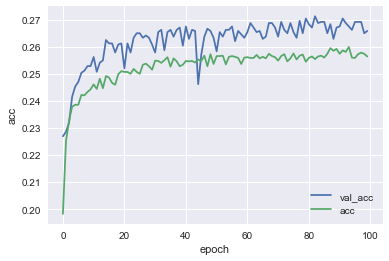

In [31]:
plt.plot(history.history['val_acc'], label='val_acc')
plt.plot(history.history['acc'], label='acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [32]:
padding = np.full(train_X.shape[0], np.nan)
prediction_trading_signal = np.concatenate((padding, predictions), axis=None)
df['p_t_s_ffnn'] = prediction_trading_signal
df.to_csv(f'../datasets/{symbol}.csv')